# Predicting Car Prices

##### In this training project we will predict car price based on prices of other cars.

**Information about data (https://archive.ics.uci.edu/ml/datasets/automobile):**

1. symboling: -3, -2, -1, 0, 1, 2, 3.   
2. normalized-losses: continuous from 65 to 256.   
3. make:   
alfa-romero, audi, bmw, chevrolet, dodge, honda,   
isuzu, jaguar, mazda, mercedes-benz, mercury,   
mitsubishi, nissan, peugot, plymouth, porsche,   
renault, saab, subaru, toyota, volkswagen, volvo   

4. fuel-type: diesel, gas.   
5. aspiration: std, turbo.   
6. num-of-doors: four, two.   
7. body-style: hardtop, wagon, sedan, hatchback, convertible.   
8. drive-wheels: 4wd, fwd, rwd.    
9. engine-location: front, rear.   
10. wheel-base: continuous from 86.6 120.9.   
11. length: continuous from 141.1 to 208.1.   
12. width: continuous from 60.3 to 72.3.   
13. height: continuous from 47.8 to 59.8.   
14. curb-weight: continuous from 1488 to 4066.   
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.   
16. num-of-cylinders: eight, five, four, six, three, twelve, two.   
17. engine-size: continuous from 61 to 326.   
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.   
19. bore: continuous from 2.54 to 3.94.   
20. stroke: continuous from 2.07 to 4.17.   
21. compression-ratio: continuous from 7 to 23.   
22. horsepower: continuous from 48 to 288.   
23. peak-rpm: continuous from 4150 to 6600.   
24. city-mpg: continuous from 13 to 49.   
25. highway-mpg: continuous from 16 to 54.   
26. price: continuous from 5118 to 45400.  

In first, let's import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv(r'D:\Python\Train_projects\Car_prediction\imports-85.data', names = cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [5]:
# cut out columns with contain not numerical data
cars_num_col = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                'curb-weight', 'engine-size',  'bore', 'stroke', 'compression-rate',
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numerical_cars = cars[cars_num_col]
numerical_cars.shape

(205, 15)

# Data Cleaning

#### 1. Replace '?'
We saw, that our data contain sign '?', we cannot work with this, so we have to replace '?' with NaN

In [6]:
numerical_cars = numerical_cars.replace('?', np.nan)
numerical_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


#### 2. Change type of data
Because further we will work with missing value, and replace it with average value of columns, we have to change type of data in first

In [7]:
numerical_cars = numerical_cars.astype('float')

In [8]:
numerical_cars.mean()

normalized-losses      122.000000
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.329751
stroke                   3.255423
compression-rate        10.142537
horsepower             104.256158
peak-rpm              5125.369458
city-mpg                25.219512
highway-mpg             30.751220
price                13207.129353
dtype: float64

In [9]:
numerical_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### 3. Raplace missing values  
Because **"Price"** is our goal feature, let's cut out rows which consist missing data about price

In [10]:
numerical_cars = numerical_cars.dropna(subset =['price'])
numerical_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Let's replace missing values by averange value for each column

In [11]:
numerical_cars = numerical_cars.fillna(numerical_cars.mean())
numerical_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### 4. Normalize the numeric columns 
Normalize the numeric columns so all values range from 0 to 1

In [12]:
normalized_cars = (numerical_cars - numerical_cars.mean()) / (numerical_cars.std())
normalized_cars['price'] = numerical_cars['price']
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0


# Univariate Model  

###### 1. Using the different numeric columns 

In [13]:
columns = normalized_cars.columns
columns = columns.tolist()
columns

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [14]:
del columns[14] # exclude 'price' column from data
columns

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

For now we have to choose the column on the basis of which we will make the forecast about car price. For this goal let’s calculate the RMSE using the different numeric columns in the data set and compare this.

In [15]:
def knn_train_test(data):
    train_df = data.iloc[:150]
    test_df = data.iloc[150:]
    knn = KNeighborsRegressor(algorithm = 'brute')
    rmses = []
    for i in columns:
        knn.fit(train_df[[i]], train_df['price'])
        prediction = knn.predict(test_df[[i]])
        rmse = np.sqrt(mean_squared_error(test_df['price'], prediction))
        rmses.append(rmse)
    rmses_dict = {}
    for i, col in enumerate(columns):
        rmses_dict[col] = rmses[i]
    return(rmses_dict)        
    

In [16]:
rmse_univariate = knn_train_test(normalized_cars)

In [17]:
rmse_univariate

{'bore': 8548.7981904120388,
 'city-mpg': 3930.9488331225393,
 'compression-rate': 5655.902027398407,
 'curb-weight': 2480.6611506438612,
 'engine-size': 3666.9495553618713,
 'height': 7082.2688460579593,
 'highway-mpg': 2724.7104778738044,
 'horsepower': 3890.2488367410001,
 'length': 7463.5713820989404,
 'normalized-losses': 10505.295398857423,
 'peak-rpm': 6561.523177780371,
 'stroke': 7939.1842604126732,
 'wheel-base': 6097.1097033034957,
 'width': 4444.0006731260855}

###### 2. Use different values for k parameter  
Let's see how different amount of neighbors effect on RMSE

In [18]:
def knn_train_test(col, data):
    train_df = data.iloc[:150]
    test_df = data.iloc[150:]
    hyper_params = [1, 3, 5, 7, 9]
    rmses = []
    for hp in hyper_params:
        knn = KNeighborsRegressor(n_neighbors = hp, algorithm = 'brute')    
        knn.fit(train_df[[col]], train_df['price'])
        prediction = knn.predict(test_df[[col]])
        rmse = np.sqrt(mean_squared_error(test_df['price'], prediction))
        rmses.append(rmse)
        
    rmses_k = {}   
    for i, hp in enumerate(hyper_params):
        rmses_k[hp] = rmses[i]
    return(rmses_k) 

In [21]:
rmses_k_dict = {}
for c in columns:
    rmse_univariate_k = knn_train_test(c, normalized_cars)
    rmses_k_dict[c] = rmse_univariate_k
    
rmses_k_dict

{'bore': {1: 9314.3700859499459,
  3: 11991.108182682772,
  5: 8548.7981904120388,
  7: 7823.4666730237668,
  9: 6362.6454224803474},
 'city-mpg': {1: 3913.0031393582412,
  3: 3629.1928500590029,
  5: 3930.9488331225393,
  7: 3587.900333387332,
  9: 3568.2651951310781},
 'compression-rate': {1: 6202.4611228440726,
  3: 5818.3748955216524,
  5: 5655.902027398407,
  7: 6252.0960434061144,
  9: 5779.8672172167153},
 'curb-weight': {1: 3703.4384738256103,
  3: 2514.0856985755549,
  5: 2480.6611506438612,
  7: 2666.1177156062308,
  9: 2591.5949991842208},
 'engine-size': {1: 5107.6249766364781,
  3: 4583.5801948967919,
  5: 3666.9495553618713,
  7: 3295.7328430546545,
  9: 3098.3916133125676},
 'height': {1: 14180.166859965739,
  3: 8866.9528281995681,
  5: 7082.2688460579593,
  7: 6652.3680692796661,
  9: 5558.7972250264274},
 'highway-mpg': {1: 4168.8784286593409,
  3: 3760.6168342249666,
  5: 2724.7104778738044,
  7: 2457.3425154209249,
  9: 2578.3407062736478},
 'horsepower': {1: 4909.1

It is a complicated to understand relationship between amount of neighbors and RMSE, so let's visual this relation

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

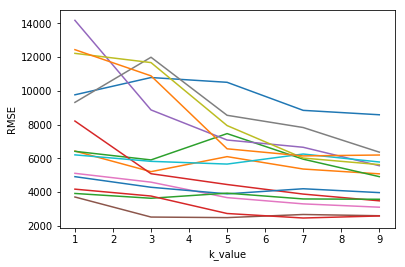

In [22]:
for k,v in rmses_k_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k_value')
    plt.ylabel('RMSE')
    plt.show

# Multivariate Model

In [23]:
def knn_train_test(feature, data):
    train_df = data.iloc[:150]
    test_df = data.iloc[150:]
    knn = KNeighborsRegressor(algorithm = 'brute')
    knn.fit(train_df[feature], train_df['price'])
    prediction = knn.predict(test_df[feature])
    rmse = np.sqrt(mean_squared_error(test_df['price'], prediction))        
    return(rmse) 

###### 1. Using all numerical features 

In [24]:
RMSE_all = knn_train_test(columns, normalized_cars)
RMSE_all

2643.0162107327451

###### 2. Using features with lowest RMSE

In [25]:
features = [['curb-weight', 'highway-mpg'],
             ['curb-weight', 'highway-mpg', 'engine-size'],
             ['curb-weight', 'highway-mpg', 'engine-size', 'horsepower'],
            ['curb-weight', 'highway-mpg', 'engine-size', 'horsepower', 'city-mpg']]
RMSE_mult = []
for f in features:
    rmse = knn_train_test(f, normalized_cars)
    RMSE_mult.append(rmse)
    
RMSE_mult


[2711.1461842100766, 2746.1195705369919, 2493.9496669292407, 2370.412266616398]

The lowest RMSE is obtained with using 4 and 5 features

# Hyperparameter Tuning
We will change amount of neighbors in range from 1 to 25, and observe how RMSE will be change 

In [26]:
def hyper_param_test(features, data):
    hyper_params = [x for x in range(1, 25)]
    rmse_values = list()
    for hp in hyper_params:
        train_df = data.iloc[:150]
        test_df = data.iloc[150:]
        knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
        knn.fit(train_df[features], train_df['price'])
        predictions = knn.predict(test_df[features])
        rmse = np.sqrt(mean_squared_error(test_df['price'], predictions))
        rmse_values.append(rmse)
    rmses_hp = {}
    for i, hp in enumerate(hyper_params):
        rmses_hp[hp] =  rmse_values[i]
    return (rmses_hp)

In [27]:
feature_all = columns
feature_four = ['curb-weight', 'highway-mpg', 'engine-size', 'horsepower']
feature_five = ['curb-weight', 'highway-mpg', 'engine-size', 'horsepower', 
                  'city-mpg']

rmses_best_model = {}
rmses_all = hyper_param_test(feature_all, normalized_cars)
rmses_best_model["feature_all"] = rmses_all

rmses_four = hyper_param_test(feature_four, normalized_cars)
rmses_best_model["feature_four"] = rmses_four

rmses_five = hyper_param_test(feature_five, normalized_cars)
rmses_best_model["feature_five"] = rmses_five

rmses_best_model

{'feature_all': {1: 3019.1592746144074,
  2: 2954.479915082763,
  3: 2762.4212600298538,
  4: 2660.8837025378189,
  5: 2643.0162107327451,
  6: 2652.3583882288308,
  7: 2546.2112414869489,
  8: 2393.2450776797255,
  9: 2368.9421861531864,
  10: 2297.7161353455849,
  11: 2179.0762301164605,
  12: 2181.7460224698889,
  13: 2130.7855381867762,
  14: 2157.3697321888399,
  15: 2111.992220557403,
  16: 2011.7853310084208,
  17: 1911.8801962276802,
  18: 1894.1476208825407,
  19: 1919.269847972045,
  20: 1898.5442010997301,
  21: 1873.8965842528507,
  22: 1876.0042553500234,
  23: 1892.3470655731383,
  24: 1888.4849391510454},
 'feature_five': {1: 2573.9946676362033,
  2: 2358.0490263742004,
  3: 2290.2398728913231,
  4: 2211.0144999236322,
  5: 2370.412266616398,
  6: 2615.2934946542478,
  7: 2579.5685156030795,
  8: 2656.2520583037008,
  9: 2657.0508962499471,
  10: 2570.0828065548822,
  11: 2521.0429132810177,
  12: 2430.7887145216819,
  13: 2384.9785489528149,
  14: 2296.3091117083095,
  

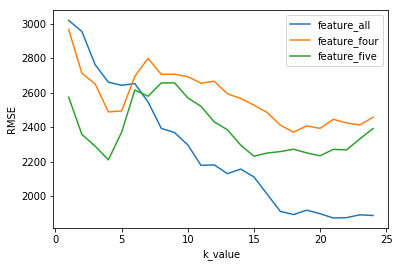

In [28]:
for k,v in rmses_best_model.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k_value')
    plt.ylabel('RMSE')
    plt.legend(rmses_best_model.keys())
    plt.show
    

### Conclusion:  
From graph we can see that RMSE is constantly decreasing with the increase in the number of neighbors only in case when we used all numerical features (blue line). In other cases RMSE in first decreasing but then begin to increase in range of 5, then begin decrease again. But anyway it is same or just a little lower than RMSE when using 4 neighbors.
So we can make a conclusion, that optimal amount of neighbors is 4, and features is **'curb-weight', 'highway-mpg', 'engine-size', 'horsepower', 'city-mpg'**